In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
%matplotlib inline

In [3]:
map_months = {
    'Janeiro':'January',
    'Fevereiro':'February',
    'Março':'March',
    'Abril':'April',
    'Maio':'May',
    'Junho':'June',
    'Julho':'July',
    'Agosto':'August',
    'Setembro':'September',
    'Outubro':'October',
    'Novembro':'November',
    'Dezembro':'December'
}

In [4]:
file = pd.read_csv("C:\\Users\\mvarshni\\Documents\\my_data\\amazon.csv", encoding = "cp1252")
file = file.drop_duplicates()
file = file.replace(map_months)

In [5]:
file.columns.values 

array(['year', 'state', 'month', 'number', 'date'], dtype=object)

### Average month-wise fires - Lineplot

In [6]:
avg_fires_month = file.groupby('month',sort=False)['number'].mean().reset_index()

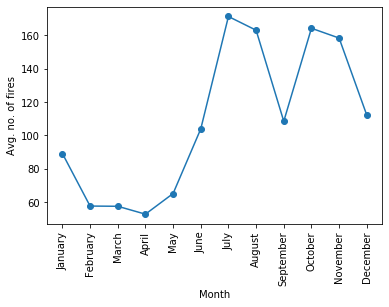

In [7]:
plt.plot(avg_fires_month['month'],avg_fires_month['number'],marker='o')
plt.xlabel('Month')
plt.ylabel('Avg. no. of fires')
plt.gca().tick_params(axis ='x', rotation = 90) 
plt.show()

### Month-wise average fires - Bar Chart

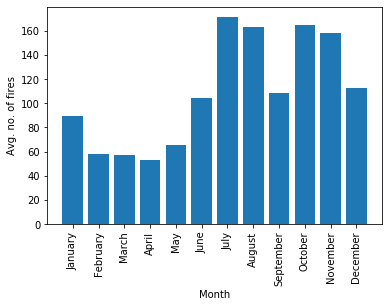

In [8]:
plt.bar(avg_fires_month['month'],avg_fires_month['number'])
plt.xlabel('Month')
plt.ylabel('Avg. no. of fires')
plt.gca().tick_params(axis ='x', rotation = 90) 
plt.show()

### Statewise Average Fires - Horizontal Bar Graph

In [9]:
state_avg_fire = file.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()

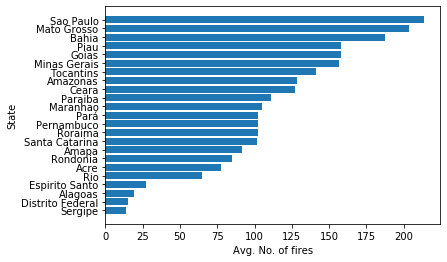

In [10]:
plt.barh(state_avg_fire['state'],state_avg_fire['number'])
plt.xlabel('Avg. No. of fires')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.show()

### Year-wise count of Fires - Barplot

In [11]:
year_avg_fires = file.groupby(['year'])['number'].sum().reset_index()

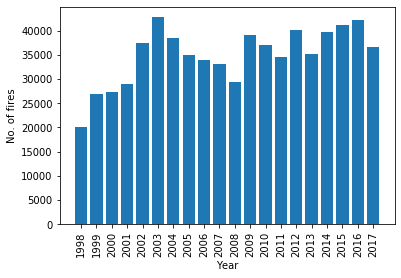

In [12]:
plt.bar(year_avg_fires['year'],year_avg_fires['number'])
plt.xticks(np.arange(1998, 2018, 1)) 
plt.gca().tick_params(axis ='x', rotation = 90) 
plt.xlabel('Year')
plt.ylabel('No. of fires')
plt.show()

### Year-wise count of fires - line graph

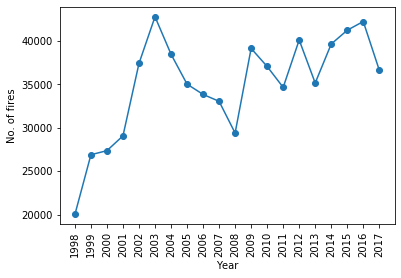

In [13]:
plt.plot(year_avg_fires['year'],year_avg_fires['number'],marker='o')
plt.xticks(np.arange(1998, 2018, 1)) 
plt.gca().tick_params(axis ='x', rotation = 90) 
plt.xlabel('Year')
plt.ylabel('No. of fires')
plt.show()

### Number of fires - Year and Month granularity 

In [14]:
no_mon = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

file1 = file.replace(no_mon)

x = file1.groupby(['year','month'])['number'].sum().reset_index()

no_to_month = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}

y = x.replace(no_to_month)

y['time_period'] = y['month']+", "+y['year'].astype(str)

y = y[['time_period','number']]

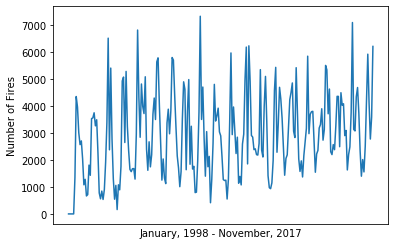

In [15]:
plt.plot(y['time_period'],y['number'])
plt.gca().axes.get_xaxis().set_ticks([])
plt.xlabel('January, 1998 - November, 2017')
plt.ylabel('Number of Fires')
plt.show()

### Heatmap of state-year fires

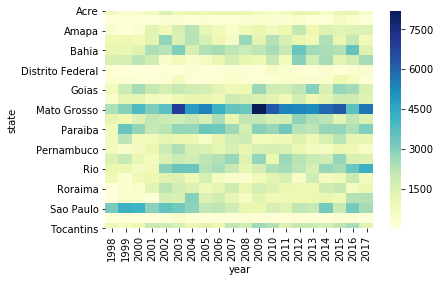

In [72]:
d = file.groupby(['year','state'])['number'].sum().reset_index()

e = d.pivot(index='state', columns='year', values='number')

ax = sb.heatmap(e,cmap="YlGnBu")